#Reactor 1D
J. Camilo Alfonso R.

Carlos M. Patiño

## En el centro del reactor
$$r=0$$
$$u(r=0)=u_{max}\left(1-\left(\frac{0}{R}\right)^2\right)=u_{max}$$
Los siguientes terminos se puede recalcular usando el teorema de L'Hopital
$$\lim_{r\rightarrow0}{\frac{c_r}{r}=\frac{0}{0}}\rightarrow \lim_{r\rightarrow0}{\frac{c_r}{r}}=\lim_{r\rightarrow0}{\frac{\delta c_r/ \delta r}{\delta r/ \delta r}}=c_r$$
$$\lim_{r\rightarrow0}{\frac{T_r}{r}=\frac{0}{0}}\rightarrow \lim_{r\rightarrow0}{\frac{T_r}{r}}=\lim_{r\rightarrow0}{\frac{\delta T_r/ \delta r}{\delta r/ \delta r}}=T_r$$


Asi, se obtienen las ecuaciones:
$$c_t(r=0)=-u_{max}c_z+D(c_{zz}+2c_{rr})-r(c,T)$$
$$T_t(r=0)=-u_{max}T_z+\frac{\lambda}{\rho c_p}(T_{zz}+2T_{rr})+\frac{-\Delta H}{\rho c_p}r(c,t)$$

En este cuaderno se busca resolver el problema para variaciones unicamente en $z$, es decir que todas las derivadas respecto a $r$ se consideran nulas.

De esta forma, las ecuaciones resultan siendo:
$$c_t(z,t)=-u_{max}c_z+Dc_{zz}-r(c,T)$$
$$T_t(z,t)=-u_{max}T_z+\frac{\lambda}{\rho c_p}T_{zz}+\frac{-\Delta H}{\rho c_p}r(c,t)$$

De forma discretizada, las ecuaciones se expresan como:
$$\frac{c_i^{n+1}-c_i^n}{\Delta t} = -u_{max}\frac{c_{i+1}^{n}-c_i^n}{\Delta z}+D\frac{c_{i+1}^n-2c_i^n+c_{i-1}^n}{\Delta z^2}-r(c,T)$$
$$\rightarrow c_i^{n+1}=c_i^{n}(1-\alpha_1-2\alpha_2)+c_{i+1}^n(\alpha_1+\alpha_2)+\alpha_2c_{i-1}^n - r(c,T)\Delta t$$
$$\alpha_1=-u_{max}\frac{\Delta t}{\Delta z}$$
$$\alpha_2=D\frac{\Delta t}{\Delta z^2}$$

$$\frac{T_i^{n+1}-T_i^n}{\Delta t} = -u_{max}\frac{T_{i+1}^{n}-T_i^n}{\Delta z}+\frac{\lambda}{\rho c_p}\frac{T_{i+1}^n-2T_i^n+T_{i-1}^n}{\Delta z^2}+\frac{-\Delta H}{\rho c_p}r(c_i^n,T_i^n)$$
$$\rightarrow T_i^{n+1} = T_i^n(1-\beta_1-2\beta_2) + T_{i+1}^n(\beta_1+\beta_2) + \beta_2T_{i-1}+\beta_3r(c_i^n,T_i^n)$$

$$\beta_1 = -u_{max}\frac{\Delta t}{\Delta z}$$
$$\beta_2 = \frac{\Delta t}{\Delta z^2} \frac{\lambda}{\rho c_p}$$
$$\beta_3 = \Delta t \frac{-\Delta H}{\rho c_p}$$

In [86]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [112]:
nz = 100
dz = 1./(nz-1)
z = linspace(0,1,nz)
nt = 1000
u_max = 0.05
sigma = 0.01
dt = sigma*dz/u_max

c = ones(nz)
c[0] = 2
#c[.5/dz : 1/dz+1]=2  

cn = ones(nz)
D = 1e-4
a1 = -u_max*dt/dz
a2 = D*dt/dz**2


lmbda = 1
rho = 1000
cp = 4181 # Agua J/(kg*K)
Delta_H = -300

b1 = -u_max*dt/dz
b2 = dt*lmbda/(dz**2*rho*cp)
b3 = dt*Delta_H/(rho*cp)

print('dz = ',dz,end='\n')
print('dt = ',dt,end='\n')
print('u-max = ',u_max,end='\n')
print('a1 = ',a1,end='\n')
print('a2 = ',a2,end='\n')
print('b1 = ',b1,end='\n')
print('b2 = ',b2,end='\n')
print('b3 = ',b3,end='\n')

dz =  0.010101010101010102
dt =  0.00202020202020202
u-max =  0.05
a1 =  -0.009999999999999998
a2 =  0.00198
b1 =  -0.009999999999999998
b2 =  4.73570916048792e-06
b3 =  -1.4495589716828656e-07


In [113]:
# Funciones
k0 = 1
E = 1
R = 8.31 # Revisar si el R corresponde al radio o a constante de gases
def F_r(c,T):
    return k0*exp(-E/(R*T))*c**2

def grafica():
    figure(figsize=(10,4))
    subplot(1,2,1); plot(z,c); title('c')
    subplot(1,2,2); plot(z,T); title('T')

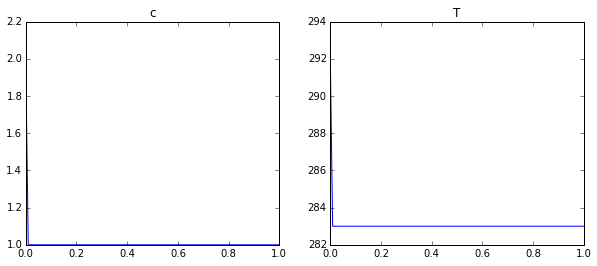

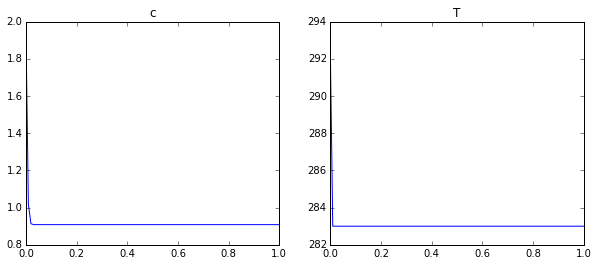

In [134]:
c = ones(nz); c[0] = 2
T = ones(nz)*(273+10); T[0] = 20+273

grafica()

# Rango de los datos que se calculan
i = 1
n = nz-1

for t in range(50):
    cn = c.copy()
    Tn = T.copy()

    c[i:n] = cn[i:n]*(1-a1-2*a2) + cn[i+1:n+1]*(a1+a2) + cn[i-1:n-1]*(a2) - dt*F_r(cn[i:n],Tn[i:n])
    T[i:n] = Tn[i:n]*(1-b1-2*b2) + Tn[i+1:n+1]*(b1+b2) + Tn[i-1:n-1]*(b2) - b3*F_r(cn[i:n],Tn[i:n])
    
    # Entrada
    c[0] = 2
    T[0] = 20+273
    
    # Salida
    c[-1] = c[-2]
    T[-1] = T[-2]
    
grafica()